In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf # type: ignore

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-06,28.012093,28.456873,27.923336,28.241163,28.209063,26687069
2014-08-07,28.322241,28.416483,27.978186,28.090876,28.058947,22218835
2014-08-08,28.100849,28.434433,27.940788,28.360636,28.328400,29895854
2014-08-11,28.421469,28.446400,28.222515,28.316257,28.284071,24294518
2014-08-12,28.148718,28.217529,27.967216,28.059464,28.027569,30840441


In [6]:
google_data.shape

(2517, 6)

In [7]:
google_data.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-08-06   28.012093   28.456873   27.923336   28.241163   28.209063   
2014-08-07   28.322241   28.416483   27.978186   28.090876   28.058947   
2014-08-08   28.100849   28.434433   27.940788   28.360636   28.328400   
2014-08-11   28.421469   28.446400   28.222515   28.316257   28.284071   
2014-08-12   28.148718   28.217529   27.967216   28.059464   28.027569   
...                ...         ...         ...         ...         ...   
2024-07-31  174.919998  175.910004  171.720001  173.149994  173.149994   
2024-08-01  171.979996  175.679993  170.509995  172.449997  172.449997   
2024-08-02  168.190002  170.210007  166.389999  168.399994  168.399994   
2024-08-05  157.369995  165.940002  156.600006  160.639999  160.639999   
2024-08-06  160.945007  161.309998  158.130005  160.876404  160.876404   

   

In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-08-06 to 2024-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Past ten years Closing Price of Google')

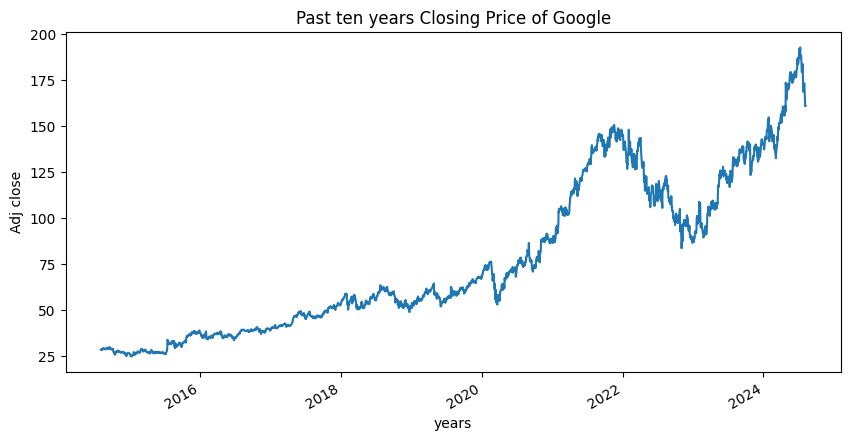

In [12]:
plt.figure(figsize=(10,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj close")
plt.title("Past ten years Closing Price of Google")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize = figsize)
    values.plot()
    plt.xlabel("years")
    plt.ylabel("Adj close")
    plt.title(f"{column_name} of Google")

In [14]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

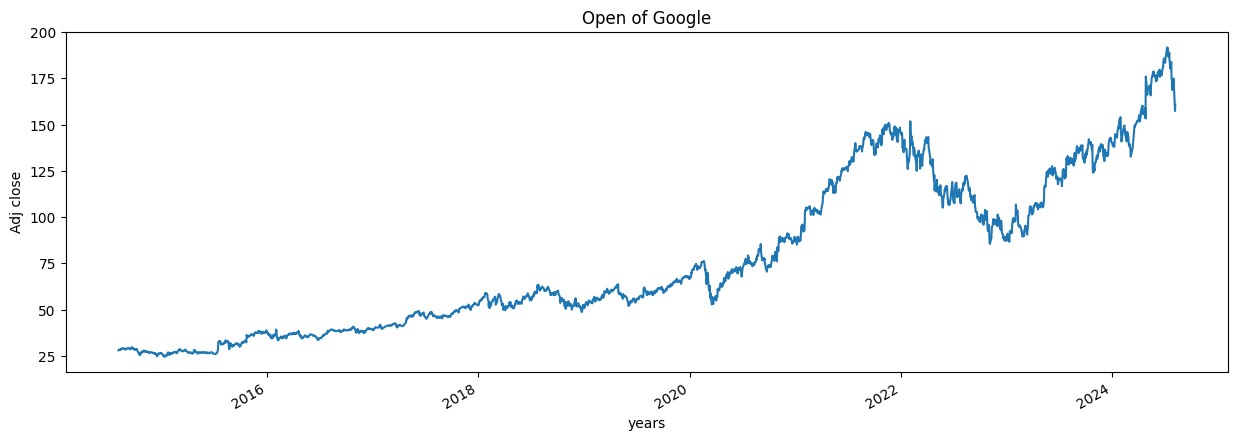

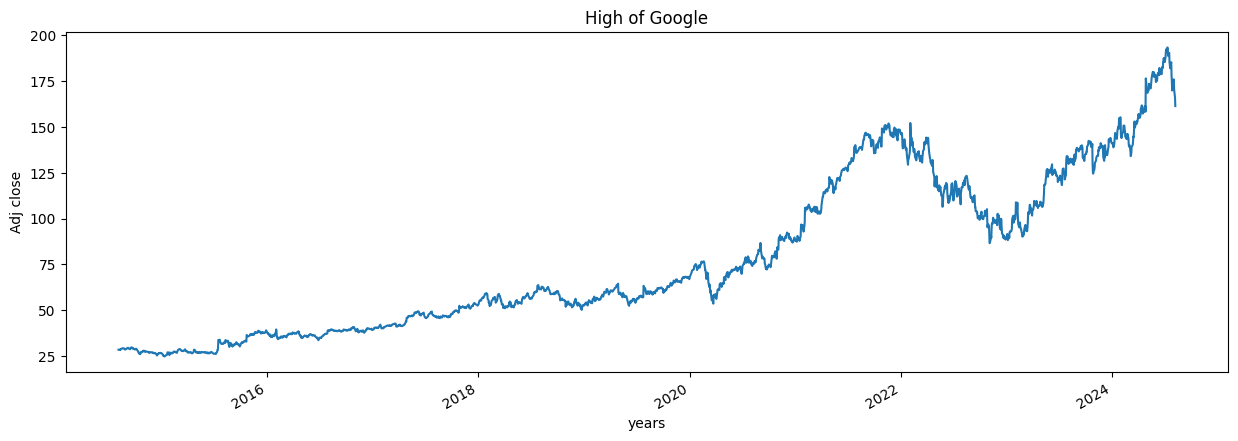

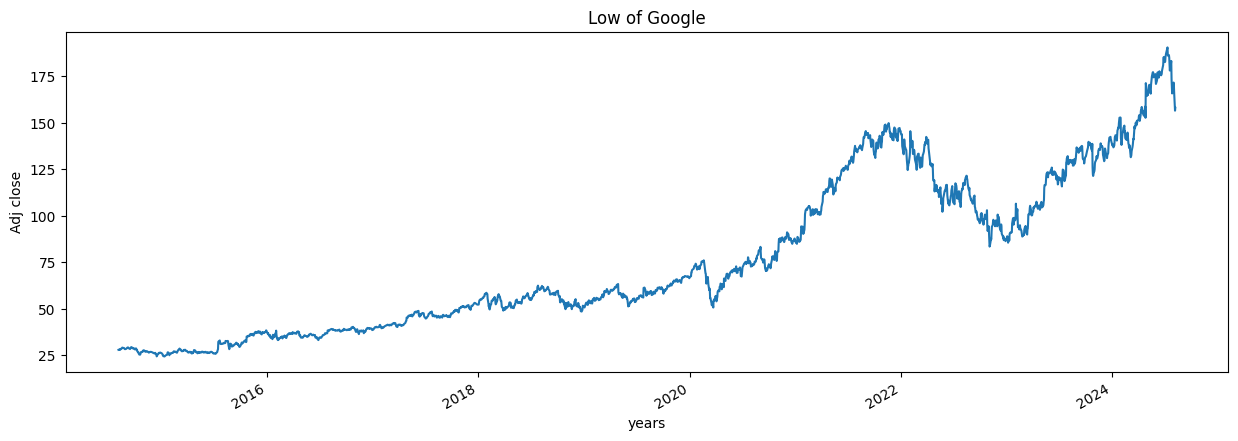

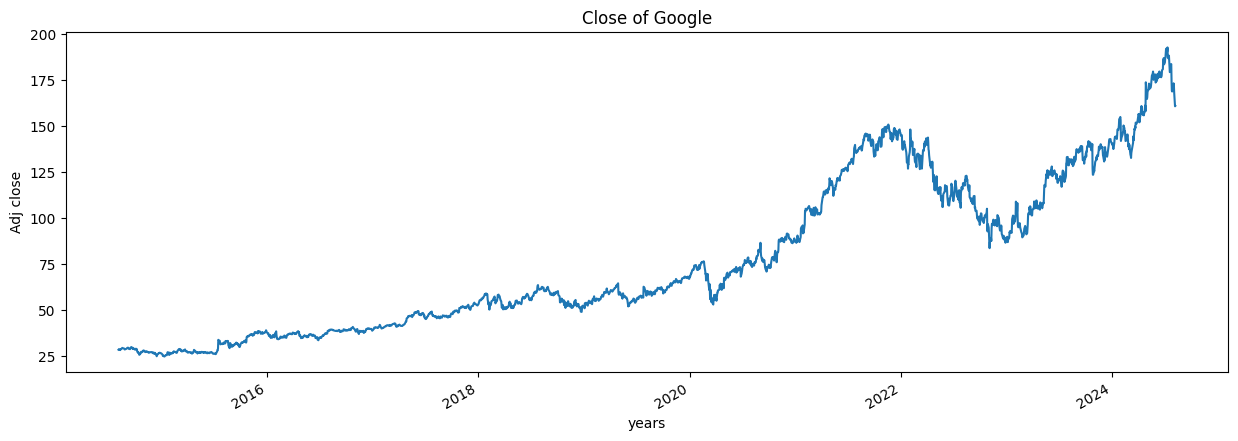

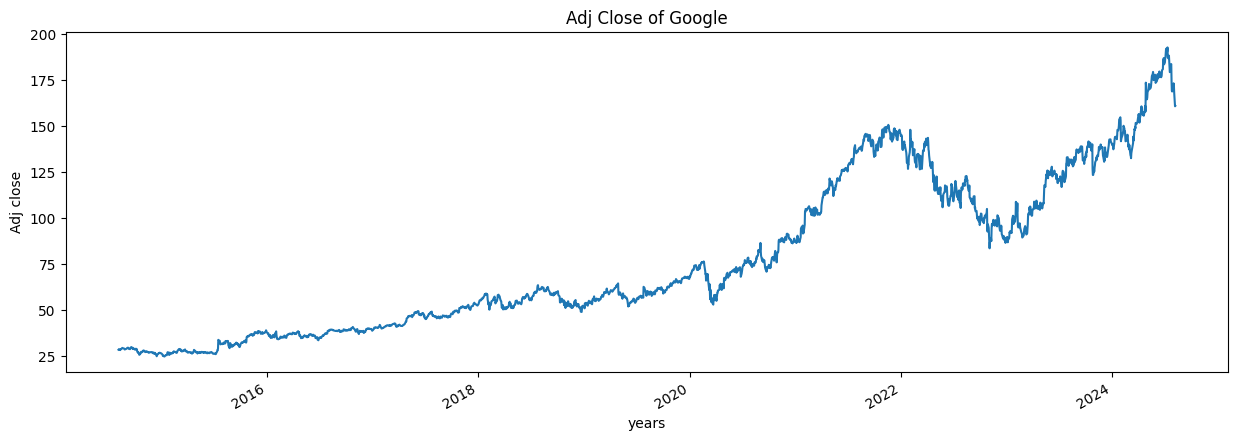

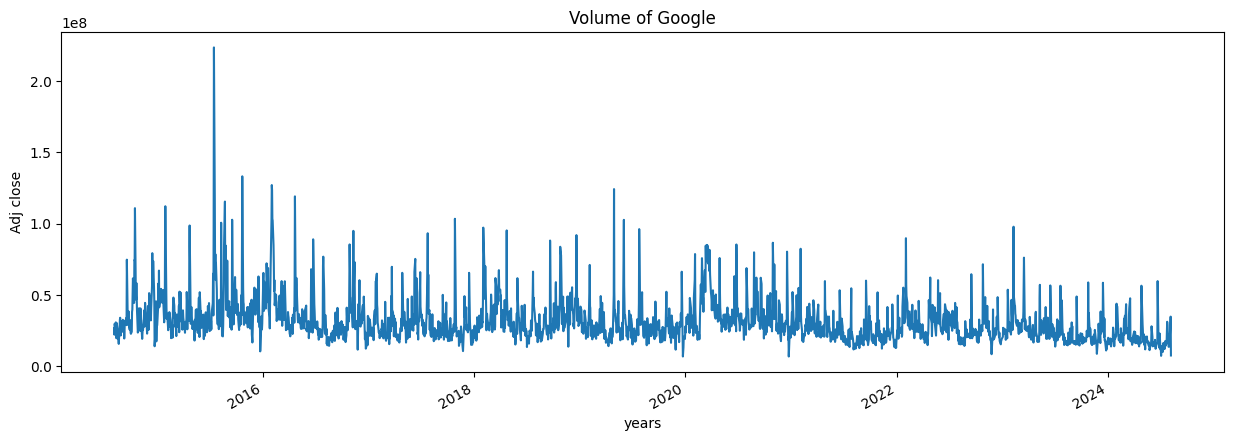

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [16]:
import pandas as pd

In [17]:
for i in range(2014, 2025):
    print(i,list(google_data.index.year).count(i))

2014 103
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 150


In [18]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [19]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-07-28          NaN
2015-07-29          NaN
2015-07-30          NaN
2015-07-31          NaN
2015-08-03    27.350234
Name: MA_for_250_days, dtype: float64

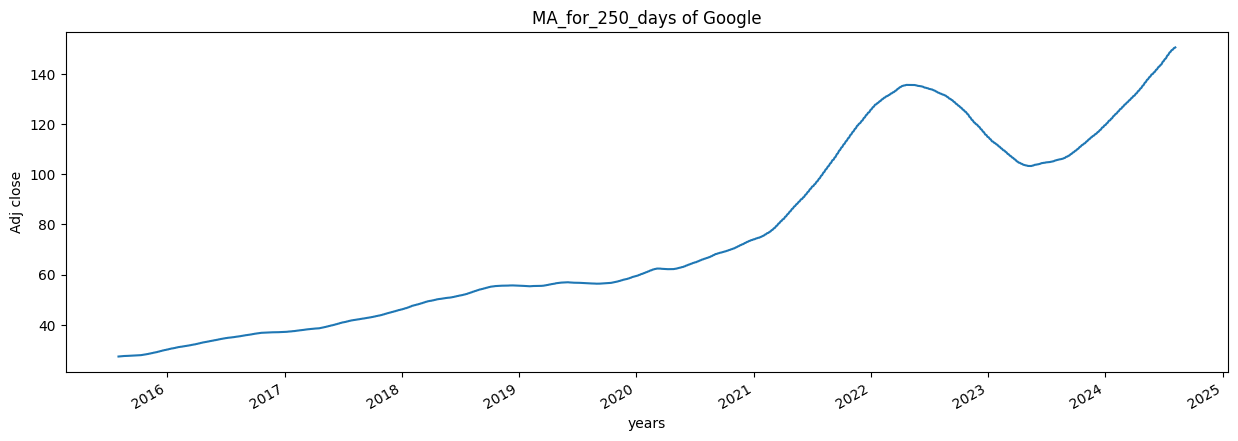

In [20]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

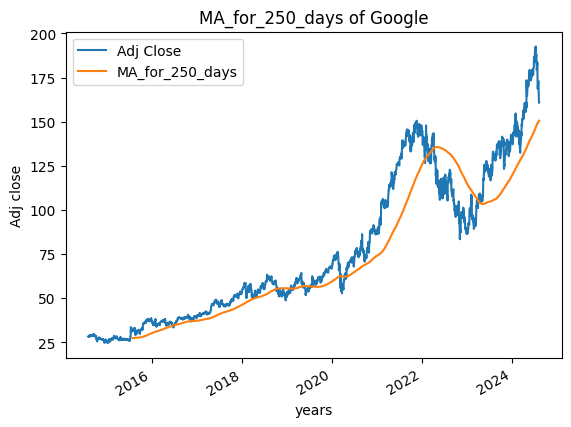

In [21]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

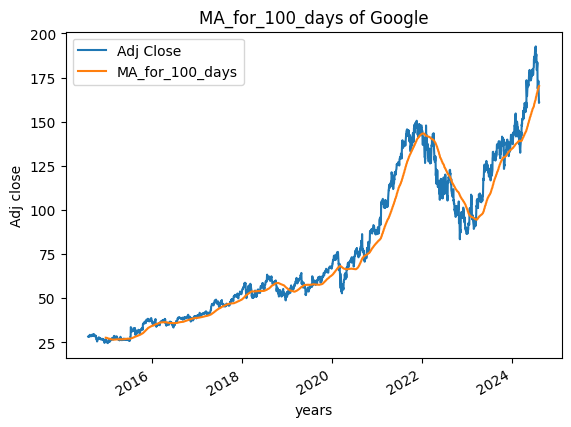

In [22]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')

In [23]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-08-06,28.209063,NaN
2014-08-07,28.058947,-0.005322
2014-08-08,28.328400,0.009603
2014-08-11,28.284071,-0.001565
2014-08-12,28.027569,-0.009069


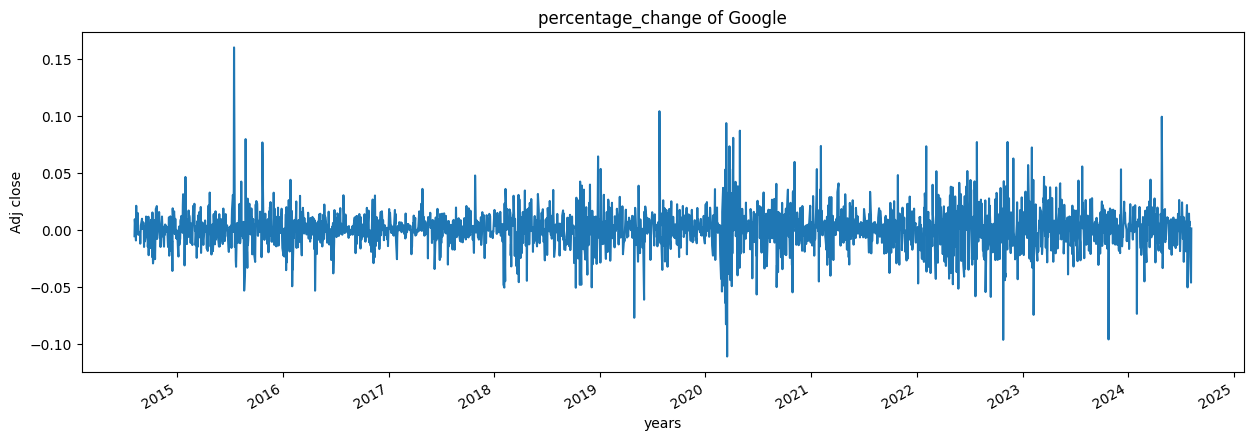

In [24]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [25]:
Adj_close_price = google_data[['Adj Close']]


In [26]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.66000366]), array([24.53215408]))

In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.02186972],
       [0.02097685],
       [0.02257952],
       ...,
       [0.85570499],
       [0.80954967],
       [0.81095577]])

In [29]:
len(scaled_data)

2517

In [30]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)
x_data, y_data

(array([[[0.02186972],
         [0.02097685],
         [0.02257952],
         ...,
         [0.01126902],
         [0.01072986],
         [0.01228809]],
 
        [[0.02097685],
         [0.02257952],
         [0.02231586],
         ...,
         [0.01072986],
         [0.01228809],
         [0.01119199]],
 
        [[0.02257952],
         [0.02231586],
         [0.02079022],
         ...,
         [0.01228809],
         [0.01119199],
         [0.01121865]],
 
        ...,
 
        [[0.67954191],
         [0.68358178],
         [0.69041415],
         ...,
         [0.87628461],
         [0.8839573 ],
         [0.87979382]],
 
        [[0.68358178],
         [0.69041415],
         [0.7116238 ],
         ...,
         [0.8839573 ],
         [0.87979382],
         [0.85570499]],
 
        [[0.69041415],
         [0.7116238 ],
         [0.69873158],
         ...,
         [0.87979382],
         [0.85570499],
         [0.80954967]]]),
 array([[0.01119199],
        [0.01121865],
        [0.

In [31]:
int(len(x_data)*0.7)

1691

In [32]:
2516 - 100 - int(len(x_data)*0.7)

725

In [33]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_train.shape)

(1691, 100, 1)
(1691, 1)
(726, 100, 1)
(1691, 1)


In [35]:
pip install tensorflow==2.15.0

Note: you may need to restart the kernel to use updated packages.


In [36]:
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2

1691/1691 [==============================] - 143s 76ms/step - loss: 0.0014
Epoch 2/2
1691/1691 [==============================] - 114s 68ms/step - loss: 3.1416e-04


In [40]:
predictions = model.predict(x_test)

23/23 [==============================] - 3s 51ms/step


In [41]:
predictions

array([[0.6805856 ],
       [0.6811904 ],
       [0.67896724],
       [0.6735808 ],
       [0.6683406 ],
       [0.66524726],
       [0.66443753],
       [0.66553664],
       [0.66620487],
       [0.6614906 ],
       [0.65369505],
       [0.6446269 ],
       [0.6395868 ],
       [0.6344757 ],
       [0.6325769 ],
       [0.6335114 ],
       [0.6373131 ],
       [0.64258164],
       [0.64646864],
       [0.6470886 ],
       [0.6473581 ],
       [0.65077925],
       [0.6551924 ],
       [0.6605466 ],
       [0.6662316 ],
       [0.66974777],
       [0.6721074 ],
       [0.66954184],
       [0.6654427 ],
       [0.6621729 ],
       [0.6662786 ],
       [0.6725144 ],
       [0.6807476 ],
       [0.68414766],
       [0.6869894 ],
       [0.6899518 ],
       [0.6942683 ],
       [0.6989525 ],
       [0.7031152 ],
       [0.7062562 ],
       [0.7059073 ],
       [0.7042467 ],
       [0.70503825],
       [0.70644635],
       [0.7075999 ],
       [0.7084471 ],
       [0.71060157],
       [0.712

In [42]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[138.95755 ],
       [139.05922 ],
       [138.68546 ],
       [137.77985 ],
       [136.89882 ],
       [136.37874 ],
       [136.2426  ],
       [136.4274  ],
       [136.53975 ],
       [135.74715 ],
       [134.4365  ],
       [132.91188 ],
       [132.0645  ],
       [131.20518 ],
       [130.88594 ],
       [131.04306 ],
       [131.68224 ],
       [132.56802 ],
       [133.22153 ],
       [133.32576 ],
       [133.37108 ],
       [133.94626 ],
       [134.68823 ],
       [135.58842 ],
       [136.54424 ],
       [137.1354  ],
       [137.53212 ],
       [137.10078 ],
       [136.4116  ],
       [135.86186 ],
       [136.55214 ],
       [137.60054 ],
       [138.98479 ],
       [139.55643 ],
       [140.03421 ],
       [140.53226 ],
       [141.25798 ],
       [142.04553 ],
       [142.7454  ],
       [143.27348 ],
       [143.21483 ],
       [142.93564 ],
       [143.06871 ],
       [143.30545 ],
       [143.49939 ],
       [143.64183 ],
       [144.00406 ],
       [144.2

In [43]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[144.20939636],
       [141.30270386],
       [138.85897827],
       [139.48776245],
       [140.77830505],
       [141.66529846],
       [142.47087097],
       [141.34016418],
       [136.02920532],
       [134.36808777],
       [133.11402893],
       [136.30738831],
       [133.61296082],
       [136.0222168 ],
       [137.19787598],
       [139.02729797],
       [139.89680481],
       [138.68968201],
       [136.55760193],
       [137.74325562],
       [141.25126648],
       [141.51396179],
       [142.79800415],
       [143.65852356],
       [142.25311279],
       [142.61820984],
       [138.46743774],
       [138.61524963],
       [139.51324463],
       [146.26106262],
       [145.96290588],
       [148.10195923],
       [143.61058044],
       [145.69720459],
       [146.62313843],
       [148.51399231],
       [149.07136536],
       [149.18173218],
       [149.07885742],
       [146.45935059],
       [146.58119202],
       [149.47540283],
       [149.21820068],
       [148

In [45]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2 ))
rmse

5.747793642439411

In [46]:
plotting_data = pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,original_test_data,predictions
Date,,
2021-09-16,144.209396,138.957550
2021-09-17,141.302704,139.059219
2021-09-20,138.858978,138.685455
2021-09-21,139.487762,137.779846
2021-09-22,140.778305,136.898819


<Figure size 1500x500 with 0 Axes>

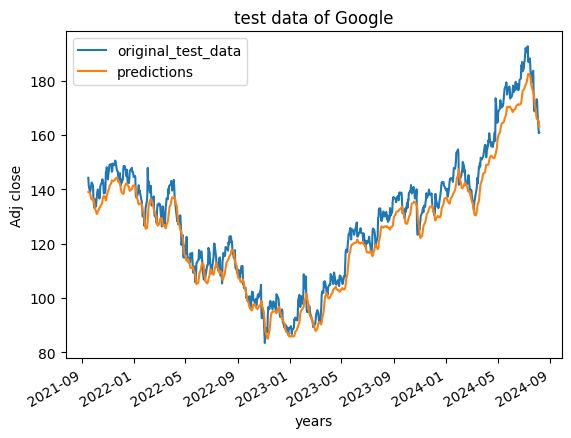

In [48]:
plot_graph((15,5), plotting_data, 'test data')

<Figure size 1500x500 with 0 Axes>

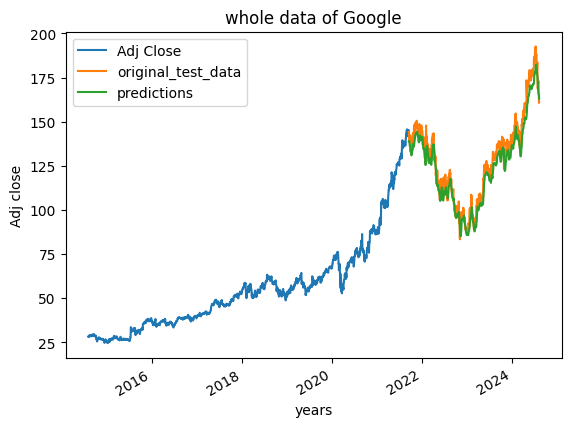

In [50]:
plot_graph((15,5), pd.concat([Adj_close_price[:splitting_len+100], plotting_data], axis=0), 'whole data')

In [51]:
model.save("latest_stock_price_predictor_model.keras")